In [1]:
import vidray as vr


In [2]:
from pathlib import Path
import pandas as pd, numpy as np

In [3]:
fpth= Path(r'/Volumes/blu/Art/Film/vidray/tests/mock/ants/frames')

In [4]:
client = vr.Cliente()

Dask client dashboard at: http://127.0.0.1:8787/status


In [5]:
vid= vr.Vid(fpth)
vid

In [6]:
len(vid)

10

In [8]:
vid.patch(2,outdir=fpth.parent/'pch')

pvid = vr.Vid.from_patches(fpth.parent/'pch')

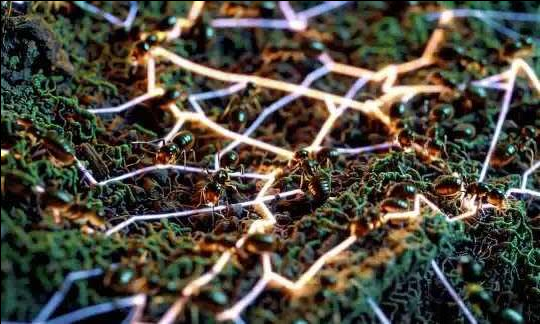

In [10]:
pvid.frame(0)

In [ ]:
for f in range(len(vid)):
    a = vid.frame(f)
    b = pvid.frame(f)
    diff = np.array(a) - np.array(b)
    same = np.median(diff) < 6
    if not same:
        print(f"Frame {f} differs")
        a.show()
        b.show()
        assert same

Frame 2 differs


In [11]:
np.isclose(a,b).all()

np.True_

In [6]:
vid.patch(3,outdir=fpth.parent/'pch')

2025-12-29 12:09:39,119 - distributed.worker - ERROR - Compute Failed
Key:       ('imread-from-value-ebd6e0a7181cb2e351f1b780700db448', 0, 0, 0)
State:     executing
Task:  <Task ('imread-from-value-ebd6e0a7181cb2e351f1b780700db448', 0, 0, 0) _execute_subgraph(...)>
Exception: "InvalidDataError(1094995529, 'Invalid data found when processing input', 'avcodec_send_packet()')"
Traceback: '  File "/opt/anaconda3/envs/streem/lib/python3.11/site-packages/imageio/__init__.py", line 97, in imread\n    return imread_v2(uri, format=format, **kwargs)\n           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^\n  File "/opt/anaconda3/envs/streem/lib/python3.11/site-packages/imageio/v2.py", line 360, in imread\n    result = file.read(index=0, **kwargs)\n             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^\n  File "/opt/anaconda3/envs/streem/lib/python3.11/site-packages/imageio/plugins/pyav.py", line 521, in read\n    desired_frame = next(self._decoder)\n                    ^^^^^^^^^^^^^^^^^^^\n  File "av/container/i

InvalidDataError: [Errno 1094995529] Invalid data found when processing input: 'avcodec_send_packet()'

 # prep mock

In [ ]:
mp4 = Path('/Users/os/Downloads/ants.mp4')
client = vr.Cliente()

Dask client dashboard at: http://127.0.0.1:8787/status


In [37]:
fpth= Path(r'/Volumes/blu/Art/Film/vidray/tests/mock/ants/frames')
vr.vid2frames(mp4,fpth)

/opt/anaconda3/envs/streem/lib/python3.11/subprocess.py:1016: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
/opt/anaconda3/envs/streem/lib/python3.11/subprocess.py:1021: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


b'ffmpeg version 8.0.1 Copyright (c) 2000-2025 the FFmpeg developers\n'
b'  built with Apple clang version 17.0.0 (clang-1700.4.4.1)\n'
b'  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/8.0.1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enabl

In [38]:
# resize each frame to 50% of original size and compress heavily
jpgs = list(fpth.glob('*.jpg'))
jpgs = [jpg for jpg in jpgs if not jpg.stem.startswith('.')]
out_fpth = fpth.parent / 'resized_compressed_frames'
out_fpth.mkdir(exist_ok=True)
# cv2
import cv2
for jpg in jpgs:
    img = cv2.imread(str(jpg))
    h, w = img.shape[:2]
    # crop bottom 10%
    img_cropped = img[:int(h*0.9), :, :]
    img_resized = cv2.resize(img_cropped, (w//2, int(h*0.9)//2))
    out_jpg = out_fpth / jpg.name
    cv2.imwrite(str(out_jpg), img_resized, [int(cv2.IMWRITE_JPEG_QUALITY), 50])

In [ ]:
import shutil
def rmtree(p: Path):
    for f in list(p.glob('*.jpg')):
        try:
            f.unlink()
        except Exception as e:
            pass
    shutil.rmtree(p)

In [40]:
rmtree(fpth)

In [41]:
jpgs =  list(out_fpth.glob('*.jpg'))
jpgs = [jpg for jpg in jpgs if not jpg.stem.startswith('.')]
jpgs = jpgs[90:143:5]

In [42]:
fpth.mkdir(exist_ok=True)
import shutil
nms = [f'frame_{i:06d}.jpg' for i in range(len(jpgs))]
[shutil.copy(jpg, fpth / nm) for jpg, nm in zip(jpgs, nms)]

[PosixPath('/Volumes/blu/Art/Film/vidray/tests/mock/ants/frames/frame_000000.jpg'),
 PosixPath('/Volumes/blu/Art/Film/vidray/tests/mock/ants/frames/frame_000001.jpg'),
 PosixPath('/Volumes/blu/Art/Film/vidray/tests/mock/ants/frames/frame_000002.jpg'),
 PosixPath('/Volumes/blu/Art/Film/vidray/tests/mock/ants/frames/frame_000003.jpg'),
 PosixPath('/Volumes/blu/Art/Film/vidray/tests/mock/ants/frames/frame_000004.jpg'),
 PosixPath('/Volumes/blu/Art/Film/vidray/tests/mock/ants/frames/frame_000005.jpg'),
 PosixPath('/Volumes/blu/Art/Film/vidray/tests/mock/ants/frames/frame_000006.jpg'),
 PosixPath('/Volumes/blu/Art/Film/vidray/tests/mock/ants/frames/frame_000007.jpg'),
 PosixPath('/Volumes/blu/Art/Film/vidray/tests/mock/ants/frames/frame_000008.jpg'),
 PosixPath('/Volumes/blu/Art/Film/vidray/tests/mock/ants/frames/frame_000009.jpg'),
 PosixPath('/Volumes/blu/Art/Film/vidray/tests/mock/ants/frames/frame_000010.jpg')]

In [43]:
rmtree(out_fpth)

In [6]:
out_fpth

PosixPath('/Volumes/blu/Art/Film/vidray/tests/mock/ants/resized_compressed_frames')